In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_mldata

from sklearn.decomposition import PCA

In [2]:
def mostrar_digito(digito):
    digito = digito.reshape(28, 28)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

# Cargando los Datos (MNIST)

In [3]:
mnist = fetch_mldata('MNIST original')

X, target_labels = mnist["data"], mnist["target"]

X.shape

(70000, 784)

Hay 70,000 imagenes, cada imagen tiene 784 features.
Son 784 feautures por imagen, porque cada imagen es de 28x28 pixeles, cada pixel de la imagen es una feature para nosotros, cada feature va a tener un valor entre 0 (blanco) y 255 (negro).

Examinenos un ejemplo:

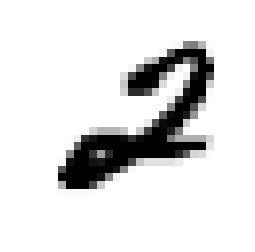

In [4]:
algun_digito = X[16000]
mostrar_digito(algun_digito)

### Numero de clusters

In [5]:
digitos = np.unique(target_labels)
print("Digitos: ", digitos)

numero_clusters = len(digitos)
print("Numero de clusters:", numero_clusters)

Digitos:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Numero de clusters: 10


### Scale Features

Este proceso se aplica en machine learning para manejar de mejor manera los datos, de preferencia valores entre 0 y 1, podemos utilizar la siguiente formula:

$z_{i}= {\frac {x_{i}−min(x)} {max(x)−min(x)}}$

En este caso nuestras features estan en valores entre 0 y 255, Como los transformamos en una escala entre 0 y 1??
A continuacion vamos a implementar la funcion normalizacion que va a recibir de parametro 

In [6]:
def scale(features):
    return features / 255

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [7]:
## Normalizamos
x_norm = scale(X)

In [8]:
kmeans = KMeans(n_clusters=numero_clusters, random_state=0).fit(x_norm)

In [9]:
clusters = kmeans.predict(x_norm)

In [10]:
kmeans.cluster_centers_.shape

(10, 784)

### Visualizando los clusters

El resultado son 10 clusters de 28x28 pixeles, a continuacion vamos a visualizar el centro de cada cluster

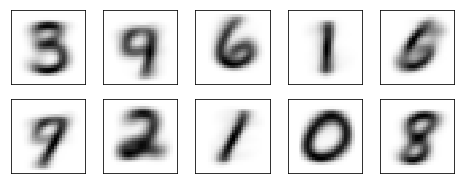

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Los centros son dígitos reconocibles, pero podemos ver que de nuestras 10 clases falta el 4 y el 7.

### Identificando los clusters

Como en K-means no utilizamos las labels, el algoritmo no sabe la identidad de cada cluster,
así que a cada cluster detectado le damos una identidad.

In [21]:
clusters_map = {}
clusters_mask = [3,9,6,1,5,9,2,1,0,8]
for i in range(10):
    clusters_map[i] = clusters_mask[i]

print(clusters_map)

## MAPEAMOS LAS PREDICCIONS AL LABEL DEL CLUSTER
predictions = [clusters_map[cluster] for cluster in clusters]

{0: 3, 1: 9, 2: 6, 3: 1, 4: 5, 5: 9, 6: 2, 7: 1, 8: 0, 9: 8}


## Accuracy score

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, target_labels)

0.5554285714285714

## Confusion Matrix

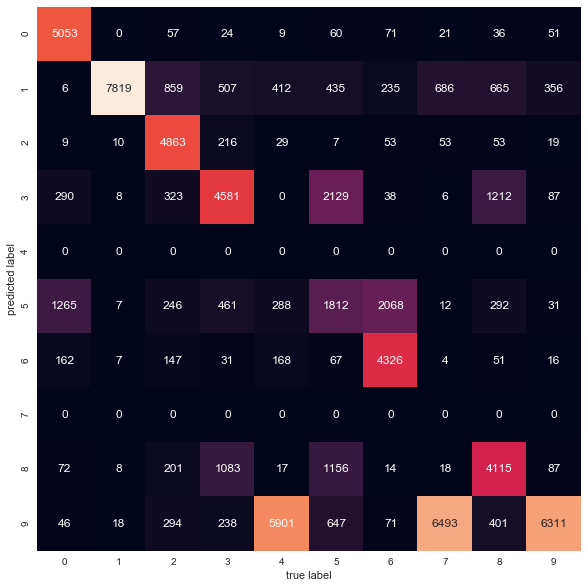

In [30]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(target_labels, predictions)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('true label')
plt.ylabel('predicted label');